## The Sparks Foundation GRIP August21
### Data Science and Business Analytics
### Task 5 : Exploratory Data Analysis - Sports
### Author : Vaishali Lonkar

Performing ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Dataset

match_df = pd.read_csv("matches.csv")
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries_df = pd.read_csv("deliveries.csv")
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
match_df.shape

(756, 18)

In [5]:
deliveries_df.shape

(179078, 21)

In [6]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
match_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [11]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [12]:
match_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [13]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
deliveries_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
deliveries_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [17]:
match_df["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

### Visualization

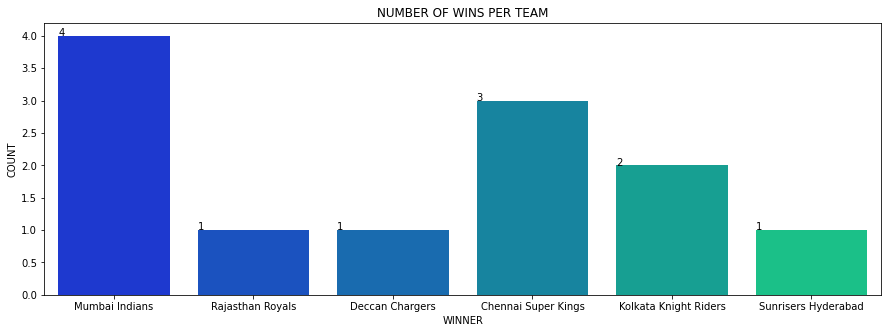

In [18]:
plt.subplots(figsize=(15,5))
season_winner = match_df.drop_duplicates('season', keep='last')
ax=sns.countplot(x='winner', data=season_winner, palette = 'winter')

plt.title("NUMBER OF WINS PER TEAM")
plt.xlabel("WINNER")
plt.ylabel('COUNT')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

From plot : Mumbai Indians is most successful team

In [19]:
defending = match_df['win_by_runs'].value_counts()
defending.sort_values(ascending=True)

146      1
105      1
87       1
42       1
93       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [20]:
chasing = match_df['win_by_wickets'].value_counts()
chasing.sort_values(ascending=True)

1       3
2       6
10     11
3      18
9      37
4      41
8      54
5      71
7      80
6      85
0     350
Name: win_by_wickets, dtype: int64

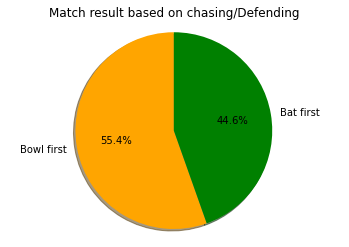

In [21]:
match_df['win_by']=np.where(match_df['win_by_runs']>0,'Bat first','Bowl first')
match=match_df.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['orange', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90,textprops={'fontsize': 10})

plt.title('Match result based on chasing/Defending')
plt.axis('equal')
plt.show()

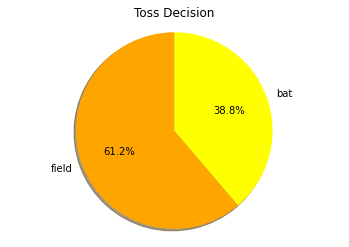

In [22]:
toss=match_df.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['orange', 'yellow']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90, textprops={'fontsize': 10})

plt.title('Toss Decision')
plt.axis('equal')
plt.show()

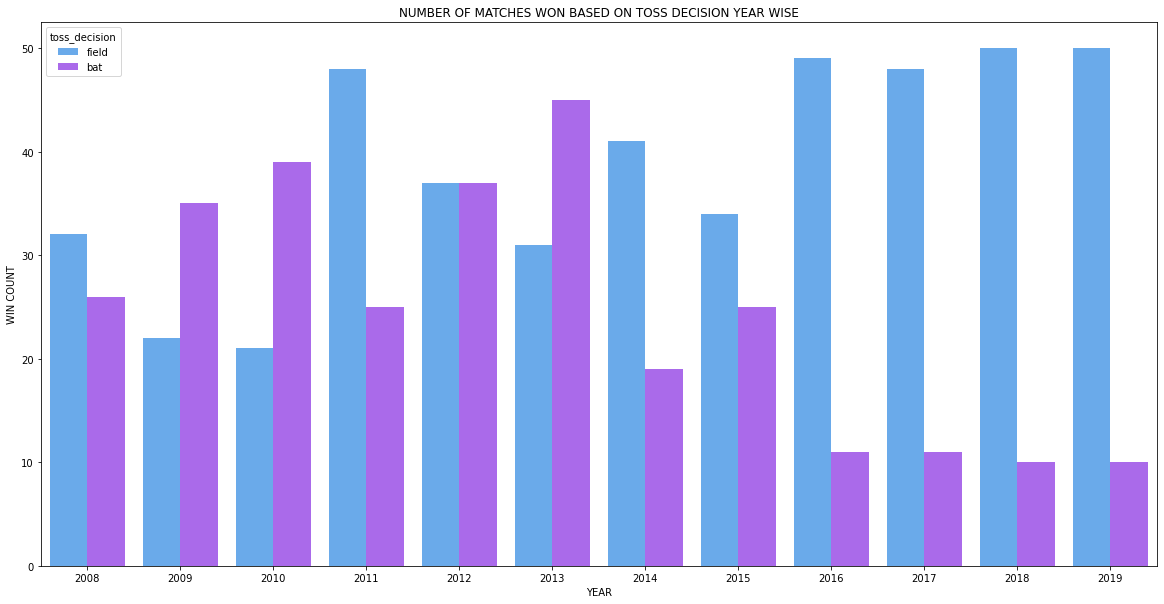

In [23]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='toss_decision',data=match_df,palette='cool')
plt.title("NUMBER OF MATCHES WON BASED ON TOSS DECISION YEAR WISE")
plt.xlabel("YEAR")
plt.ylabel("WIN COUNT")
plt.xticks()
plt.yticks()
plt.show()

In [24]:
final_matches=match_df.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner', 'toss_winner']].reset_index(drop=True).sort_values('season')

,season,winner,toss_winner
1,2008,Rajasthan Royals,Rajasthan Royals
2,2009,Deccan Chargers,Royal Challengers Bangalore
3,2010,Chennai Super Kings,Chennai Super Kings
4,2011,Chennai Super Kings,Chennai Super Kings
5,2012,Kolkata Knight Riders,Chennai Super Kings
6,2013,Mumbai Indians,Mumbai Indians
7,2014,Kolkata Knight Riders,Kolkata Knight Riders
8,2015,Mumbai Indians,Chennai Super Kings
9,2016,Sunrisers Hyderabad,Sunrisers Hyderabad
0,2017,Mumbai Indians,Mumbai Indians


Individual player performance

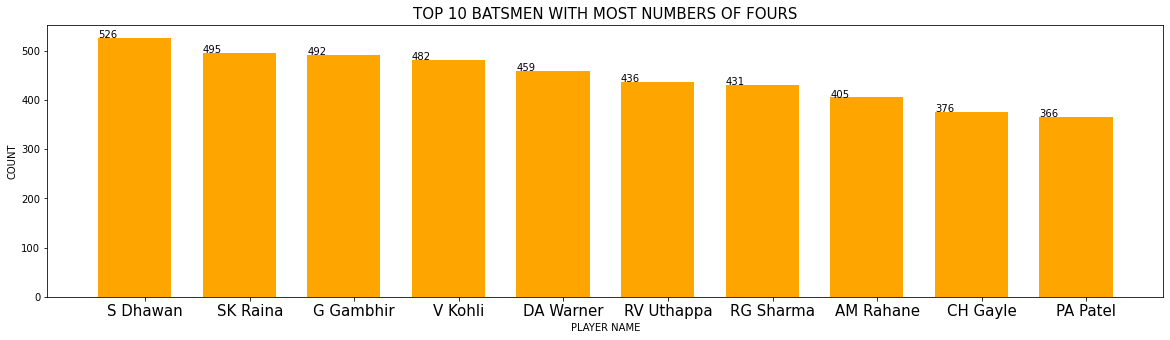

In [25]:
batsman_df = deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]
labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots(figsize=(20,5))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='orange')
ax.set_xticks(ind+((width)/7.))
ax.set_xticklabels(labels, rotation='0',fontsize=15)
ax.set_ylabel("COUNT")
ax.set_xlabel("PLAYER NAME")
ax.set_title("TOP 10 BATSMEN WITH MOST NUMBERS OF FOURS",fontsize = 15)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

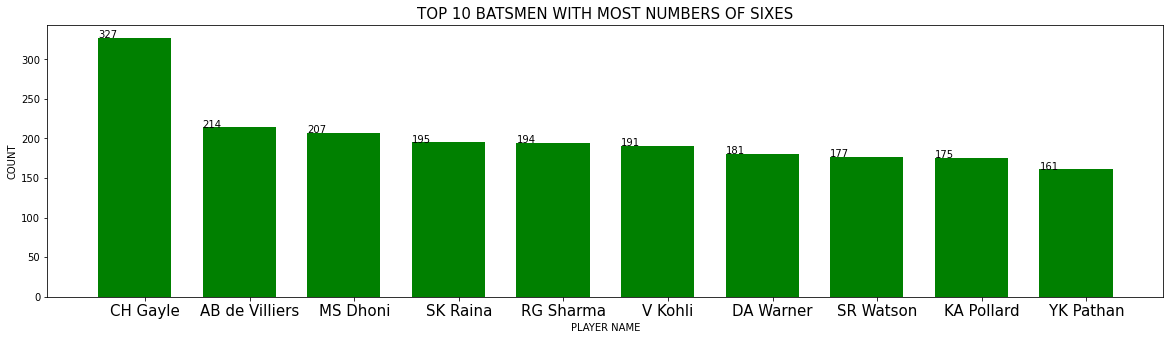

In [26]:
batsman_df = deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]
labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots(figsize=(20,5))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/7.))
ax.set_xticklabels(labels, rotation='0',fontsize=15)
ax.set_ylabel("COUNT")
ax.set_xlabel("PLAYER NAME")
ax.set_title("TOP 10 BATSMEN WITH MOST NUMBERS OF SIXES",fontsize = 15)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

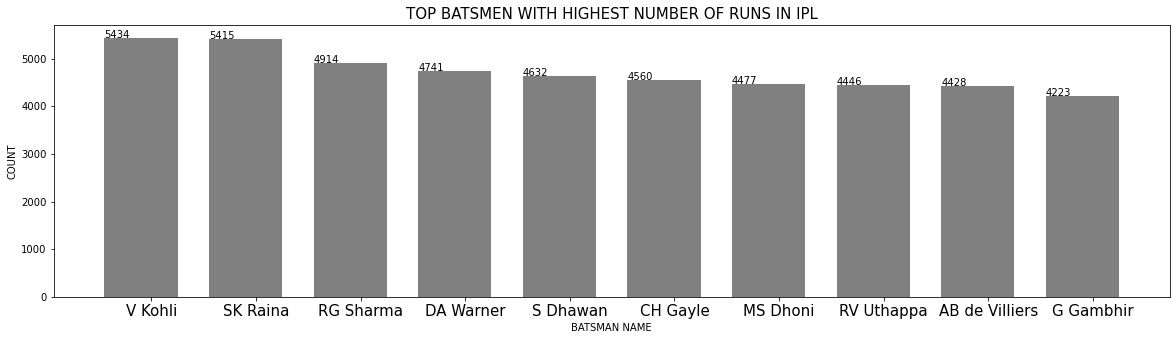

In [27]:
batsman_df = deliveries_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]
labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots(figsize=(20,5))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='gray')
ax.set_xticks(ind+((width)/7.))
ax.set_xticklabels(labels, rotation='0',fontsize=15)
ax.set_ylabel("COUNT")
ax.set_xlabel("BATSMAN NAME")
ax.set_title("TOP BATSMEN WITH HIGHEST NUMBER OF RUNS IN IPL",fontsize = 15)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

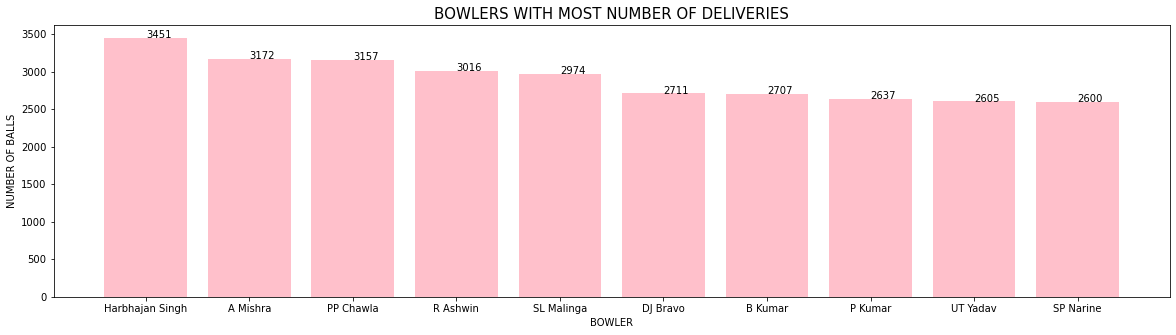

In [28]:
df = pd.merge(match_df,deliveries_df, left_on='id', right_on='match_id')
bowler = df['bowler'].value_counts()[:10]
plt.figure(figsize=(20,5))
plt.bar(x=bowler.index, height=bowler.values,color='pink')
plt.title('BOWLERS WITH MOST NUMBER OF DELIVERIES', fontsize=15)
plt.xlabel('BOWLER')
plt.ylabel('NUMBER OF BALLS')
for i,v in enumerate(bowler.values):
    plt.text(x=i, y=v+1, s=v)
plt.show()

THE BOWLERS WITH MOST NUMBER OF WICKETS IN IPL ARE :
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


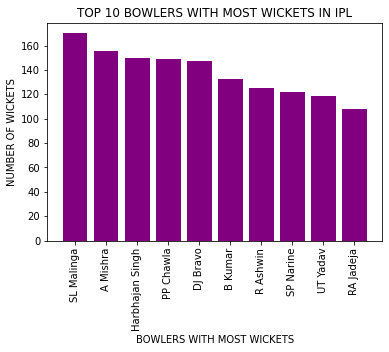

In [29]:
bowling_wickets= deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('THE BOWLERS WITH MOST NUMBER OF WICKETS IN IPL ARE :\n',top_bowlers)
plt.bar(top_bowlers['bowler'],top_bowlers['Wickets'],color='purple')
plt.xticks(rotation=90)
plt.xlabel('BOWLERS WITH MOST WICKETS')
plt.ylabel('NUMBER OF WICKETS')
plt.title('TOP 10 BOWLERS WITH MOST WICKETS IN IPL')
plt.show()

Text(0, 0.5, 'COUNT')

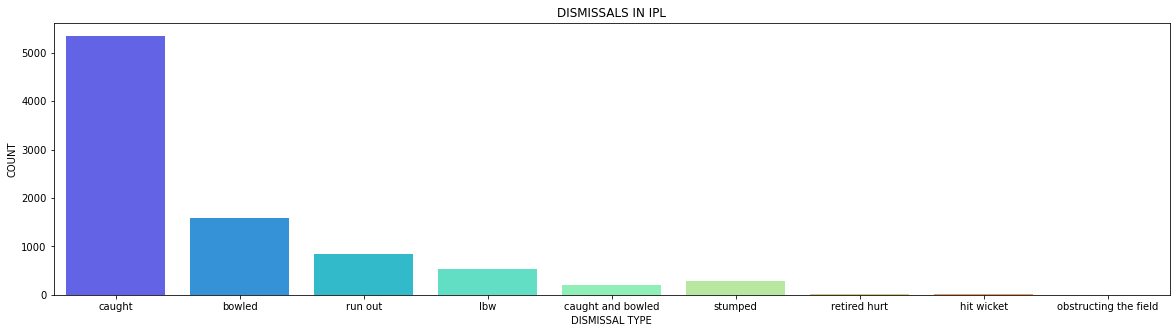

In [30]:
plt.figure(figsize=(20,5))
ax=sns.countplot(deliveries_df.dismissal_kind,palette='rainbow')
plt.title("DISMISSALS IN IPL")
plt.xlabel("DISMISSAL TYPE")
plt.ylabel("COUNT")

### Conclusion : 

Most successful team in IPL : Mumbai Indians

Most Successful Player in IPL : Chris Gayle

Player With Most Number Of Fours : Shikhar Dhawan

Player With Most Number Of Sixes : Chris Gayle

Top Bowlers With Most Wickets In IPL : SL Malinga(170)

Most Number Of Dissmisal Based On Types : Caught

# Thank You !!!